Rusty Bargain is a used car buying and selling company that is developing an app to attract new buyers. In the application, we can quickly find out the market value of your car. We have access to historical data, vehicle technical specifications, vehicle model versions and vehicle prices. Our task is to create a model that determines the market value of the car.

Rusty Bargain is interested in:

- prediction quality;
- the speed of the model in predicting;
- the time required to train the model

## Data Preparation

### Load Data

In [1]:
#import pandas and numpy for data preprocessing and manipulation
import pandas as pd
import numpy as np
import re

#import module for visuialization
import matplotlib.pyplot as plt
import seaborn as sns

#import module for splitting
from sklearn.model_selection import train_test_split

#import module for preprocessing
from sklearn.preprocessing import StandardScaler

#import time for time computation
from time import time
import time

#import machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

#import metric to measure quality of model
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
df.duplicated().sum()

262

In [5]:
df.isnull().sum().sort_values(ascending=False)

NotRepaired          71154
VehicleType          37490
FuelType             32895
Gearbox              19833
Model                19705
DateCrawled              0
Price                    0
RegistrationYear         0
Power                    0
Mileage                  0
RegistrationMonth        0
Brand                    0
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [6]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [7]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


<div style="background-color:rgba(0, 255, 172, 0.07)"
     
From the steps above and reading the data taken from the file '/datasets/car_data.csv', it is known that the file has 16 columns and 354369 rows.
Then perform Data Preprocessing with the following steps:

- Renaming the column to lower case
- Removes duplicate values
- Fill in null value
- Change the data type

     
</div>

### Data Preprocessing

In [8]:
# Renaming the column to lower case
columns = []
for name in df.columns.values:
    name = re.sub('([A-Z])', r' \1', name).lower().replace(' ', '_')[1:]
    columns.append(name)

In [9]:
df.columns = columns

In [10]:
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
#Mengisi Nilai Null
#df.isnull().sum().sort_values(ascending=False)/df.shape[0]

In [14]:
for col in ['not_repaired','vehicle_type','fuel_type', 'gearbox', 'model']:
    df[col].fillna('unknown', inplace=True)

In [15]:
#df.isnull().sum().sort_values(ascending=False)/df.shape[0]

In [16]:
# Change the data type
def change_datatype(df, cols, type_val):
    for col in cols:
        df[col] = df[col].astype(type_val)
        
change_datatype(df, ['date_crawled', 'date_created', 'last_seen'], 'datetime64[ns]')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354107 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354107 non-null  datetime64[ns]
 1   price               354107 non-null  int64         
 2   vehicle_type        354107 non-null  object        
 3   registration_year   354107 non-null  int64         
 4   gearbox             354107 non-null  object        
 5   power               354107 non-null  int64         
 6   model               354107 non-null  object        
 7   mileage             354107 non-null  int64         
 8   registration_month  354107 non-null  int64         
 9   fuel_type           354107 non-null  object        
 10  brand               354107 non-null  object        
 11  not_repaired        354107 non-null  object        
 12  date_created        354107 non-null  datetime64[ns]
 13  number_of_pictures  354107 no

### Explore Data Analytics

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Data Preprocessing has been carried out, namely changing column names to lower case and '-', removing duplicate values, replacing all null values ​​with 'unknown', and changing the data type of columns related to dates. The number of rows after Data Preprocessing is 354107 which previously was 354369. Then do EDA (Explore Data Analytic) with the following steps:
- Create and study histograms
- Removed outliers
     
</div>

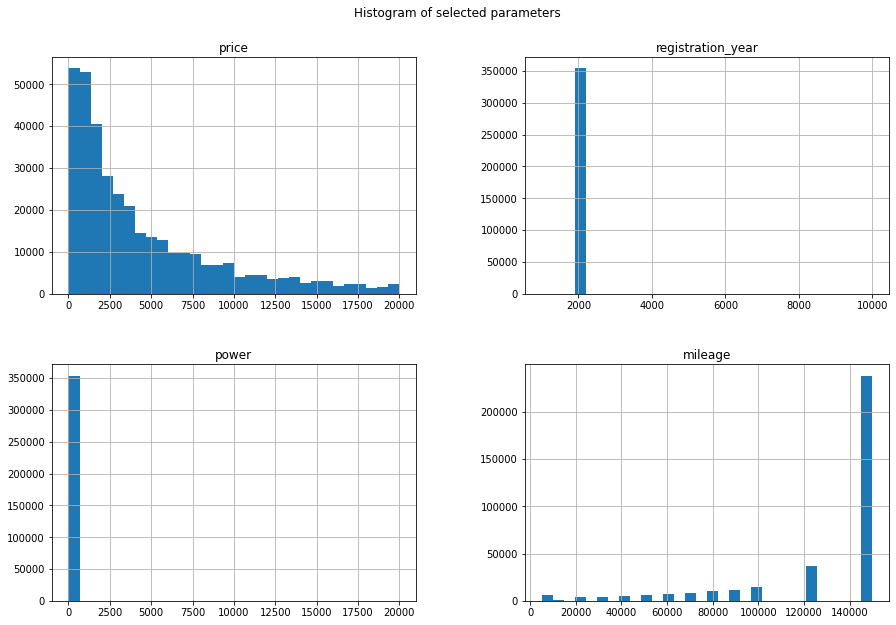

In [18]:
df[['price', 'registration_year', 'power', 'mileage']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of selected parameters', y=0.95);

In [19]:
#Histogram price
df_filter = df.query('2000 <= price <= 20000')

<div style="background-color:rgba(0, 255, 172, 0.07)"

- The raw data with the price histogram can be seen that there is a vehicle priced at 0, this makes no sense
- The company determines the price of 2000 is the minimum price
- To fix that, it is necessary to filter the table from 2000 to 20000 prices.
     
</div>

In [20]:
#Histogram registration_year
df_filter = df_filter.query('1900 <= registration_year <= 2016')

<div style="background-color:rgba(0, 255, 172, 0.07)"

A filter with data excluding registration_year below 1900 and above 2016, because the data that is 'crawled' is all data for 2016.
     
</div>

In [21]:
#Histogram Power
df_filter = df_filter.query('50 <= power <= 2100')

<div style="background-color:rgba(0, 255, 172, 0.07)"


A filter with data excluding power below 50 hp and 2100 hp, because based on research the car with the highest hp is 2012.
     
</div>

In [22]:
#Specifies car_age
df_filter['car_age'] = df_filter['date_created'].dt.year - df_filter['registration_year']

In [23]:
df_filter.head(5)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,car_age
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-07-04 01:46:00,5
2,2016-03-14 12:52:00,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14,0,90480,2016-05-04 12:47:00,12
4,2016-03-31 17:25:00,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-06-04 10:17:00,8
6,2016-01-04 20:48:00,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-01-04,0,67112,2016-05-04 18:18:00,12
8,2016-04-04 23:42:00,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,unknown,2016-04-04,0,94505,2016-04-04 23:42:00,2


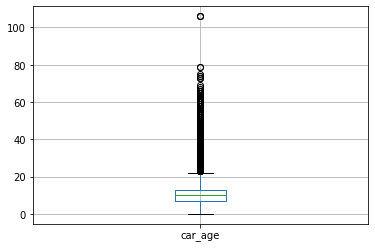

In [24]:
df_filter.boxplot('car_age')
plt.show()

In [25]:
q1_age = df_filter['car_age'].quantile(0.25)
q3_age = df_filter['car_age'].quantile(0.75)
iqr_age = q3_age - q1_age
lower_whisker_age = q1_age - (1.5 * iqr_age)
upper_whisker_age = q3_age + (1.5 * iqr_age)
print('Lower Whisker Age adalah', lower_whisker_age)
print('Upper Whisker Age adalah', upper_whisker_age)

Lower Whisker Age adalah -2.0
Upper Whisker Age adalah 22.0


In [26]:
df_filter.query('car_age < 1')

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,car_age
181,2016-03-21 14:43:00,3000,unknown,2016,auto,75,fabia,150000,0,petrol,skoda,unknown,2016-03-21,0,24782,2016-03-31 17:45:00,0
294,2016-10-03 20:43:00,2390,unknown,2016,unknown,83,jazz,150000,12,petrol,honda,no,2016-10-03,0,78713,2016-03-13 03:17:00,0
393,2016-01-04 19:49:00,6250,unknown,2016,manual,310,astra,150000,0,unknown,opel,unknown,2016-01-04,0,58809,2016-03-04 16:47:00,0
541,2016-03-18 22:48:00,4550,unknown,2016,manual,101,golf,150000,8,gasoline,volkswagen,no,2016-03-18,0,52062,2016-03-25 03:47:00,0
598,2016-05-04 00:58:00,12000,unknown,2016,manual,105,golf,70000,6,unknown,volkswagen,no,2016-04-04,0,64823,2016-07-04 11:15:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353178,2016-03-15 11:56:00,3390,unknown,2016,unknown,116,3er,100000,5,petrol,bmw,unknown,2016-03-15,0,59075,2016-03-16 08:16:00,0
353301,2016-03-14 14:55:00,2450,unknown,2016,manual,117,cooper,150000,2,petrol,mini,no,2016-03-14,0,29640,2016-01-04 21:16:00,0
353456,2016-03-16 20:55:00,8500,small,2016,manual,69,c1,5000,3,petrol,citroen,no,2016-03-16,0,49716,2016-07-04 07:46:00,0
354068,2016-03-17 22:06:00,3700,unknown,2016,manual,90,golf,150000,4,gasoline,volkswagen,unknown,2016-03-17,0,55122,2016-03-19 16:30:00,0


In [27]:
df_filter['car_age'] = df_filter['car_age'].replace(0, 1)

In [28]:
df_filter.query('car_age < 1')

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,car_age


<div style="background-color:rgba(0, 255, 172, 0.07)"

The "car_age" column has been added. Judging from the boxplot, there are outliers with cars over 22 years old. The outliers are left alone because the car really exists / the car is very antique. The age of the car has also been changed from 0 to 1 year, because maybe the used car only lasts a few months.
     
</div>

In [29]:
#Correlation
df_filter_cor = df_filter[['price', 'power', 'mileage', 'car_age']]

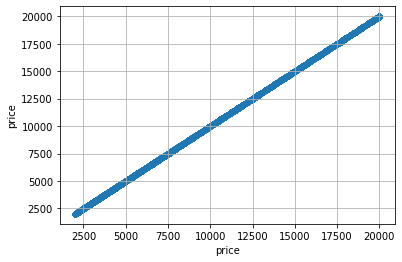

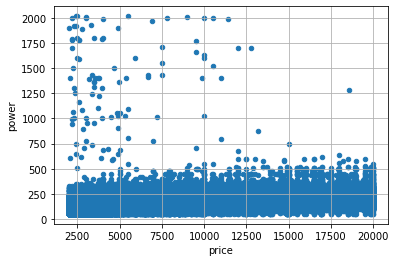

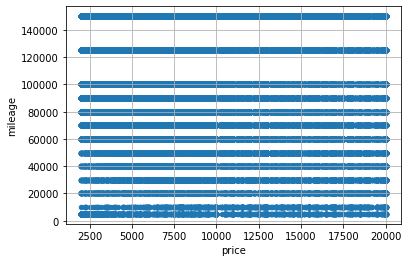

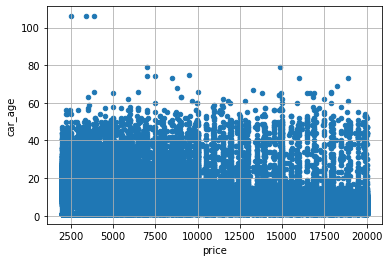

In [30]:
group_data = ['price', 'power', 'mileage', 'car_age']
for group_data in df_filter_cor:
    df_filter_cor.plot(x='price', y=group_data, kind='scatter', grid=True)

In [31]:
df_filter.corr()['price']

price                 1.000000
registration_year     0.375149
power                 0.351569
mileage              -0.347231
registration_month    0.024867
number_of_pictures         NaN
postal_code           0.055643
car_age              -0.377018
Name: price, dtype: float64

<div style="background-color:rgba(0, 255, 172, 0.07)"

It can be seen from the scatter plot and correlation table that the relationship between 'price' and others is almost all weakly correlated.
     
</div>

## Model Training

### Features Engineering

In [32]:
#drop unused column
df_new = df_filter.drop(['date_crawled','last_seen', 'number_of_pictures', 'registration_month', 
              'date_created', 'registration_year', 'postal_code'], axis=1)

In [33]:
df_new.head(5)

,price,vehicle_type,gearbox,power,model,mileage,fuel_type,brand,not_repaired,car_age
1,18300,coupe,manual,190,unknown,125000,gasoline,audi,yes,5
2,9800,suv,auto,163,grand,125000,gasoline,jeep,unknown,12
4,3600,small,manual,69,fabia,90000,gasoline,skoda,no,8
6,2200,convertible,manual,109,2_reihe,150000,petrol,peugeot,no,12
8,14500,bus,manual,125,c_max,30000,petrol,ford,unknown,2


In [34]:
categorical_features = {
    'vehicle_type',
    'gearbox',
    'model',
    'fuel_type',
    'brand',
    'not_repaired',
}

In [35]:
for features in categorical_features:
    print(f'features {features} {len(df_new[features].value_counts())}')

features not_repaired 3
features model 247
features fuel_type 8
features brand 40
features gearbox 3
features vehicle_type 9


In [36]:
#One Hot Encoding
df_ohe = pd.get_dummies(df_new, drop_first=True)
df_ohe.head()

,price,power,mileage,car_age,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,not_repaired_unknown,not_repaired_yes
1,18300,190,125000,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9800,163,125000,12,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,3600,69,90000,8,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2200,109,150000,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,14500,125,30000,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Splitting data into train, validation and test sets

In [37]:
#Define target and features
target = df_ohe['price']
features = df_ohe.drop('price', axis=1)

In [38]:
#Split data (features & targets) source into training and testing with a ratio of 80 : 20
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)

In [39]:
#Split data (features & targets) train into training and validation with a ratio of 75 : 25
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.25, random_state=12345)

In [40]:
# Check the size if it is 80:20:20 or 3:1:1
features_train.shape, features_test.shape, features_valid.shape

((112117, 307), (37373, 307), (37373, 307))

### Linear Regression for sanity check

In [41]:
%%time

model = LinearRegression()
model.fit(features_train, target_train)
predicted_train = model.predict(features_train)
predicted_valid = model.predict(features_valid)
predicted_test = model.predict(features_test)

print("Train RMSE :", mean_squared_error(target_train, predicted_train, squared=False).round(2))
print("Valid RMSE :", mean_squared_error(target_valid, predicted_valid, squared=False).round(2))
print("Test RMSE :", mean_squared_error(target_test, predicted_test, squared=False).round(2))

Train RMSE : 2854.25
Valid RMSE : 2871.21
Test RMSE : 2863.25
CPU times: user 7.05 s, sys: 2.29 s, total: 9.33 s
Wall time: 9.34 s


### RandomForest Regression with HyperParameter Tuning

In [42]:
%%time

model = RandomForestRegressor(n_estimators=100, max_depth=8)
model.fit(features_train, target_train)
predicted_train = model.predict(features_train)
predicted_valid = model.predict(features_valid)
predicted_test = model.predict(features_test)

print("Train RMSE :", mean_squared_error(target_train, predicted_train, squared=False).round(2))
print("Valid RMSE :", mean_squared_error(target_valid, predicted_valid, squared=False).round(2))
print("Test RMSE :", mean_squared_error(target_test, predicted_test, squared=False).round(2))

Train RMSE : 2210.61
Valid RMSE : 2250.06
Test RMSE : 2259.12
CPU times: user 1min 32s, sys: 376 ms, total: 1min 32s
Wall time: 1min 33s


In [43]:
%%time

d=[]
list_estimator = [100,200,300]
for est in list_estimator:
    model = RandomForestRegressor(random_state = 12345, n_estimators=est)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    rmse_score = mean_squared_error(target_valid, predicted_valid) ** 0.5
    d.append(
        {
            'estimator': est,
            'rmse_score': rmse_score
        }
    )

best_param = pd.DataFrame(d).nsmallest(1, ['rmse_score'], keep='first')
rmse_score = best_param['rmse_score'].values
best_param

CPU times: user 18min 40s, sys: 3.66 s, total: 18min 44s
Wall time: 18min 46s


,estimator,rmse_score
2,300,1776.722112


### XGBoost with HyperParameter Tuning

In [44]:
%%time

d=[]
list_estimator = [100,200,300]
for est in list_estimator:
    model = XGBRegressor(random_state = 12345, n_estimators=est, n_jobs=-1)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    rmse_score = mean_squared_error(target_valid, predicted_valid) ** 0.5
    d.append(
        {
            'estimator': est,
            'rmse_score': rmse_score
        }
    )

best_param = pd.DataFrame(d).nsmallest(1, ['rmse_score'], keep='first')
rmse_score = best_param['rmse_score'].values
best_param

CPU times: user 20min 36s, sys: 3.37 s, total: 20min 40s
Wall time: 20min 42s


,estimator,rmse_score
2,300,1758.826825


### LGBM with HyperParameter Tuning

In [45]:
%%time

d=[]
list_estimator = [100,200,300]
for est in list_estimator:
    model = LGBMRegressor(random_state = 12345, n_estimators=est)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    rmse_score = mean_squared_error(target_valid, predicted_valid) ** 0.5
    d.append(
        {
            'estimator': est,
            'rmse_score': rmse_score
        }
    )

best_param = pd.DataFrame(d).nsmallest(1, ['rmse_score'], keep='first')
rmse_score = best_param['rmse_score'].values
best_param

CPU times: user 19.3 s, sys: 530 ms, total: 19.9 s
Wall time: 20 s


,estimator,rmse_score
2,300,1792.916393


### CatBoost with HyperParameter Tuning

In [46]:
%%time

d=[]
iteration = [100,200,300]
for iterate in iteration:
    model = CatBoostRegressor(random_state = 12345, iterations=iterate, verbose=False)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    rmse_score = mean_squared_error(target_valid, predicted_valid) ** 0.5
    d.append(
        {
            'estimator': est,
            'rmse_score': rmse_score
        }
    )

best_param = pd.DataFrame(d).nsmallest(1, ['rmse_score'], keep='first')
rmse_score = best_param['rmse_score'].values
best_param

CPU times: user 14.5 s, sys: 41.1 ms, total: 14.6 s
Wall time: 15 s


,estimator,rmse_score
2,300,1802.630208


<div style="background-color:rgba(0, 255, 172, 0.07)"

Sanity checks have been carried out using Linear Regression, and several models with HyperParameter tuning, namely RandomForest Regressor, XGBoost, LGBM, and Catboost Regressor. HyperParameter tuning for each model is almost the same, using the [100,200,300] estimator. The results and analysis are in the next step.
</div>

## Model Analysis

In [47]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [48]:
model = ['Linear Regression', 'Random Forest Regressor', 'XGBoost Regressor', 'LightGBM Regressor', 'Catboost Regressor']
rmse = [2871, 1776, 1758, 1792, 1802 ]
wall_time = [9, 1020, 1200, 14, 15]


In [49]:
data_model = {'model':model, 'rmse_score':rmse, 'time_in_sec':wall_time}
df_model = pd.DataFrame(data=data_model)
df_model

,model,rmse_score,time_in_sec
0,Linear Regression,2871,9
1,Random Forest Regressor,1776,1020
2,XGBoost Regressor,1758,1200
3,LightGBM Regressor,1792,14
4,Catboost Regressor,1802,15


Text(0.5, 1.0, 'Time required to tune hyperparameters')

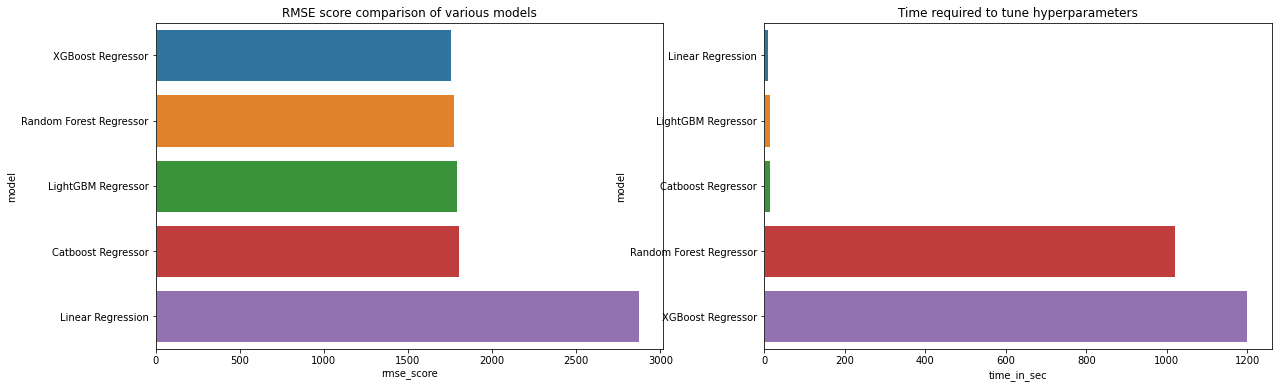

In [50]:
# plot performance metrics
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.set_style('whitegrid')

sns.barplot(data = df_model.sort_values('rmse_score'), 
            y= 'model',
            x= 'rmse_score',
            orient= 'h',
            ax=ax[0],
            )
ax[0].set_title('RMSE score comparison of various models')

sns.barplot(data = df_model.sort_values('time_in_sec'), 
            y= 'model',
            x= 'time_in_sec',
            orient= 'h',
            ax=ax[1],
            )
ax[1].set_title('Time required to tune hyperparameters')

<div style="background-color:rgba(0, 255, 172, 0.07)"

From the analysis performed, we can see that among the different models, linear regression has the worst rmse, namely 2871. Meanwhile, the XGBoost regression has the best score of 1758, but takes a long time of 1200 Sec. With LightGBM the rmse score obtained is not much different from XGBoost, namely 1792 with a very fast time of 14 Sec. Catboost also performs fast calculations but the rmse score is higher than XGBoost and LightGBM. The RMSE Score is a good way to see how well the model fits the data. The bigger the RMSE, the bigger the difference between the predicted and observed values, which means the worse the fit of the model with the data. Conversely, the smaller the RMSE, the better the model can fit the data. It is useful to compare the RMSE of two different models against each other to see which model fits the data better. From the analysis performed, LightGBM is the most ideal model to use.
</div>